# CISCO Post Scraper And Preliminary Analysation

#### LOADING DEPENDENCIES

In [1]:
import requests
import bs4

##### class post_info


Creating post_info class which bundles all relevant info to a post


In [2]:
class post_info:
    def __init__(self,post,date,views,upvotes,replies,link,resolved):
        self.post = post
        self.date = date
        self.upvotes = int(upvotes)
        self.replies = int(replies)
        self.views = int(views)
        self.link = link
        self.resolved = resolved
        
    def disp_info(self):
        print("\n\nPost : " +self.post+"\nDate : "+self.date+ "\nReplies : "+str(self.replies) +"\t\t views : "+str(self.views)+"\t\t upvotes :"+str(self.upvotes )+"\t\t resolved : "+str(self.resolved)+"\nLink : "+self.link)


#### SCRAPING HELPER FUNCTIONS

##### load_page(url)

Thisfunction loads all the post in the page of given "url" and returns a list of post_info class object

parameter(s) :
    url : page link

In [3]:
def load_page(url):
    res = requests.get(url)
    soup = bs4.BeautifulSoup(res.text,'lxml')
    
    posts = []
    
    raw_replies = (soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.lia-component-messages-column-thread-replies-count span"))
    n_rep = len(raw_replies)
    
    replies = []
    for reply in raw_replies:
        replies.append(reply.getText())
        
        
    raw_views = soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.lia-component-messages-column-topic-views-count span")
    n_views = len(raw_views)
    
    views = []
    for view in raw_views:
        views.append(view.getText())
        
        
    raw_dates = (soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.lia-info-area > span:nth-of-type(1) span.local-date"))
    n_dates = len(raw_dates)
    
    dates = []
    for date in raw_dates:
        dates.append(date.getText()[1:])
        
    
    raw_titles = (soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.MessageSubject a.lia-custom-event.lia-link-navigation.page-link"))
    n_titles = len(raw_titles)
    
    titles = []
    for title in raw_titles:
        _t = title.getText().split()
        titles.append(" ".join(_t))
    
    
    raw_upvotes = soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.custom-grid-kudos span")
    n_upvotes = len(raw_upvotes)
    
    upvotes = []
    for upvote in raw_upvotes:
        upvotes.append(upvote.getText()[4:-3])
        
    links_html = soup.select('div.lia-quilt-column-alley-left tr.lia-list-row a.page-link.lia-link-navigation.lia-custom-event')
    n_links = len(links_html)
    
    links = []
    for link in links_html:
        links.append('https://supportforums.cisco.com/'+link.attrs["href"])
    
    trs = soup.select('div.lia-quilt-column-alley-left tbody tr')
    n_res = len(trs)
    
    resolved = []
    for tr in trs:
        resolved.append(len(tr.find_all("td",{"aria-label" : "This thread is solved"})))
    
    
        
    if n_rep == n_upvotes == n_titles == n_dates == n_views == n_res:
        
        print("number of posts : "+str(n_rep))
        
        for i in range(n_titles):
            posts.append(post_info(titles[i],dates[i],views[i],upvotes[i],replies[i],links[i],resolved[i]))
        
        return posts
    
    else:
        
        print("error encountered : unequal data contraints")
        
        print("number of replies : "+str(n_rep))
        print("number of views " + str(n_views))
        print("number of upvotes " +str(n_upvotes))
        print("number of dates " +str(n_dates))
        print("number of titles "+str(n_titles))
        
        return None

##### load_topic(base_url, num_pages, start_page = 50,sep_pages = False, display = False)


This function loads pages from a particular topics base url


parameters : 


    base_url : base url of given topic
    
    num_pages : number of pages to be loaded
    
    start_page : starting page number for scraping
    
    sep_pages : if True returns list of list of page posts
    
    display : Set true to display results after completion

In [4]:
def load_topic(base_url, num_pages, start_page = 50,sep_pages = False, display = False):
    
    all_posts = []
    sep_posts = []
    
    for i in range(num_pages):
        
        load_url = base_url + str(start_page+i)
        page_posts = load_page(load_url)
        
        sep_posts.append(page_posts)
        all_posts.extend(page_posts)
        
        if page_posts != None:
            print("page number : "+str(start_page+i) + " loaded successfully")
        else:
            print("page number : "+str(start_page+i) + " load error")
            return all_posts
        
    if display:
        for i in range(len(all_posts)):
            all_posts[i].disp_info()
            
    if sep_pages :
        return sep_posts
    else:
        return all_posts
        

In [22]:
base_url = 'https://supportforums.cisco.com/t5/lan-switching-and-routing/bd-p/6016-discussions-lan-switching-routing/page/'
posts = load_topic(base_url, num_pages = 100, start_page = 650,sep_pages = False, display = False )

number of posts : 15
page number : 650 loaded successfully
number of posts : 15
page number : 651 loaded successfully
number of posts : 15
page number : 652 loaded successfully
number of posts : 15
page number : 653 loaded successfully
number of posts : 15
page number : 654 loaded successfully
number of posts : 15
page number : 655 loaded successfully
number of posts : 15
page number : 656 loaded successfully
number of posts : 15
page number : 657 loaded successfully
number of posts : 15
page number : 658 loaded successfully
number of posts : 15
page number : 659 loaded successfully
number of posts : 15
page number : 660 loaded successfully
number of posts : 15
page number : 661 loaded successfully
number of posts : 15
page number : 662 loaded successfully
number of posts : 15
page number : 663 loaded successfully
number of posts : 15
page number : 664 loaded successfully
number of posts : 15
page number : 665 loaded successfully
number of posts : 15
page number : 666 loaded successful

In [23]:
print(len(posts))

1500


In [24]:
posts[0].disp_info()



Post : Carry two vlans on a switchport
Date : 02-21-2017
Replies : 5		 views : 101		 upvotes :0		 resolved : 1
Link : https://supportforums.cisco.com//t5/lan-switching-and-routing/carry-two-vlans-on-a-switchport/td-p/3035905


In [25]:
import string
def save_csv(posts,filename):
    
    csv = open(filename, "w",encoding='utf-8')
    columnTitleRow = "Post,Date,Views,Replies,Upvotes,Link,Resolved\n"
    csv.write(columnTitleRow)
    table = str.maketrans({key: None for key in string.punctuation})
    
    for post in posts:
        post_string = post.post.translate(table) 
        row = post_string + "," + post.date + "," + str(post.views) + "," + str(post.replies) + "," + str(post.upvotes) + "," +post.link+"," + str(post.resolved)+ "\n"
        csv.write(row)
        

In [26]:
save_csv(posts,"posts2.csv")

In [27]:
import pandas as pd
data = pd.read_csv("LAN_Switching_Routing_info.csv",parse_dates=['Date'])

print(len(data))
data.head(15)

10500


,Post,Date,Views,Replies,Upvotes,Link,Resolved
0,IOS Upgrade on cisco WSC6509E switche,2018-05-23,83,1,0,https://supportforums.cisco.com//t5/lan-switch...,0
1,C68008P10G Interface Module Installat,2018-05-23,141,6,0,https://supportforums.cisco.com//t5/lan-switch...,1
2,Cisco ACI mode vs NXOS Mode,2018-05-22,217,3,0,https://supportforums.cisco.com//t5/lan-switch...,1
3,Visio stencil CISCO 892FSP,2016-11-14,586,4,0,https://supportforums.cisco.com//t5/lan-switch...,0
4,Problem with a simple route,2018-05-22,129,5,10,https://supportforums.cisco.com//t5/lan-switch...,0
5,Authorization failed on Routers for a,2018-05-22,119,9,0,https://supportforums.cisco.com//t5/lan-switch...,0
6,cisco catalyst 3850 license downgrade,2018-05-22,146,1,0,https://supportforums.cisco.com//t5/lan-switch...,1
7,SNMP community with nonexisting ACL,2018-05-22,139,2,0,https://supportforums.cisco.com//t5/lan-switch...,1
8,Dropping 6th ICMP packets,2011-04-25,10455,9,10,https://supportforums.cisco.com//t5/lan-switch...,1
9,problem enable ssh switch C4500X16FP,2018-05-22,109,5,5,https://supportforums.cisco.com//t5/lan-switch...,0


### Loaded Topics

The following Topic datasets will be used for analysis which contain all the posts info for the period jan 2017 and april 2018 .


| index | Topic Name                   | filename                       | Size  |
|-------|------------------------------|--------------------------------|-------|
|   1.  |   WAN, Routing and Switching | WAN_Routing_Switching_info.csv | 4800  |
|   2.  |   LAN, Switching and Routing | LAN_Switching_Routing_info.csv | 10500 |
|   3.  |   IP Telephony               | IP_telephony_info.csv          | 6750  |
|   4.  |   Firewalling                | Firewalling_info.csv           | 3750  |

## RETRIEVING POST DATA


A post_data class object stores post attributes such as heading , content and replies bundled together.


In [4]:
class post_data:
    def __init__(self,heading,content,replies):
        self.heading = heading
        self.content = content
        self.replies = replies
        
    def disp_info(self):
        print("HEADING :\t"+self.heading)
        print("\n\nPOST :\n\n"+self.content)
        print("\nREPLIES :\t")
        if len(self.replies):
            for reply in self.replies:
                print("\n\n"+reply)
        else:
            print("No Replies!")
        

##### scrape_post_data(load_url,display = False)

this function extract post info by going to post page.

parameters:

    load_url: link to post discussion page.
    
    display: set to True to display posts while scraping.

In [203]:
def scrape_post_data(load_url,display = False):
    res = requests.get(load_url,timeout = 5)
    soup = bs4.BeautifulSoup(res.text,'lxml')
    
    heading = soup.select("div.lia-thread-topic h5")[0].getText()
    
    paras = soup.select("div.lia-thread-topic p")
    content = ""
    for para in paras:
        content += (para.getText())
    content = content.split()
    content = " ".join(content)
    
    replies_html = soup.select("div.lia-thread-reply div.lia-message-body")
    replies = []
    for reply in replies_html:
        reply = reply.getText().split()
        reply = " ".join(reply)
        replies.append(reply)
        
    post = post_data(heading,content,replies) 
        
    if display:
        post.disp_info()
            
    return post     
                

##### post_data_loader(data,num_pages=3,start_page=0) 

This function loads post data by calling scrape_post_data() function .

paramenters:
    
    data: pandas dataframe containing info about post references .
    
    num_pages : number of pages whose post data you want to scrape.
    
    start_page : the page you want the scraping to start with.
   
    NOTE: each page contains 15 posts so while choosing number of pages be careful about the number of links that you scrape 
    because if it is too big then it may cause timeouterror.

In [204]:
def post_data_loader(data,num_pages=3,start_page=0):
    if((num_pages+start_page)*15 <= len(data)):
        links = data['Link'].tolist()[start_page*15:(num_pages+start_page)*15]
        post_dat = []
        for i,link in enumerate(links):
            post_dat.append(scrape_post_data(link))
            #if(i%5 == 0):
            print("Post : "+str(i)+" loaded")
        return post_dat
    else:
        print("Invalid Inputs")

In [148]:
import pandas as pd
data = pd.read_csv("WAN_Routing_Switching_info.csv",parse_dates=['Date'])

print(len(data))
data.head(15)

4800


,Post,Date,Views,Replies,Upvotes,Link,Resolved
0,Cisco ISR4331K9 router errors out of b,2018-05-02,146,4,10,https://supportforums.cisco.com//t5/wan-routin...,0
1,bcp38 vs ipv4 verify unicast source re,2018-05-09,92,2,0,https://supportforums.cisco.com//t5/wan-routin...,0
2,Routing traffic issue,2018-05-08,234,10,0,https://supportforums.cisco.com//t5/wan-routin...,0
3,ASR 1006 SASR1R2AISK9MS,2018-05-10,102,0,0,https://supportforums.cisco.com//t5/wan-routin...,0
4,NBAR2 and MS OneDrive,2018-05-10,83,0,0,https://supportforums.cisco.com//t5/wan-routin...,0
5,Carving BGP Routes Inbound,2018-05-09,189,2,5,https://supportforums.cisco.com//t5/wan-routin...,1
6,VPN Almost have this working Im so c,2018-05-09,85,3,0,https://supportforums.cisco.com//t5/wan-routin...,0
7,router not able to access ssh and snmp,2018-05-09,124,5,0,https://supportforums.cisco.com//t5/wan-routin...,0
8,Registering and contract for used SX20,2018-05-10,73,0,0,https://supportforums.cisco.com//t5/wan-routin...,0
9,iBGP loss of connectivity,2018-05-08,174,2,0,https://supportforums.cisco.com//t5/wan-routin...,1


In [234]:
post_dat = post_data_loader(data,6,28)

Post : 0 loaded
Post : 1 loaded
Post : 2 loaded
Post : 3 loaded
Post : 4 loaded
Post : 5 loaded
Post : 6 loaded
Post : 7 loaded
Post : 8 loaded
Post : 9 loaded
Post : 10 loaded
Post : 11 loaded
Post : 12 loaded
Post : 13 loaded
Post : 14 loaded
Post : 15 loaded
Post : 16 loaded
Post : 17 loaded
Post : 18 loaded
Post : 19 loaded
Post : 20 loaded
Post : 21 loaded
Post : 22 loaded
Post : 23 loaded
Post : 24 loaded
Post : 25 loaded
Post : 26 loaded
Post : 27 loaded
Post : 28 loaded
Post : 29 loaded
Post : 30 loaded
Post : 31 loaded
Post : 32 loaded
Post : 33 loaded
Post : 34 loaded
Post : 35 loaded
Post : 36 loaded
Post : 37 loaded
Post : 38 loaded
Post : 39 loaded
Post : 40 loaded
Post : 41 loaded
Post : 42 loaded
Post : 43 loaded
Post : 44 loaded
Post : 45 loaded
Post : 46 loaded
Post : 47 loaded
Post : 48 loaded
Post : 49 loaded
Post : 50 loaded
Post : 51 loaded
Post : 52 loaded
Post : 53 loaded
Post : 54 loaded
Post : 55 loaded
Post : 56 loaded
Post : 57 loaded
Post : 58 loaded
Post : 

In [235]:
post_dat[9].disp_info()

HEADING :	Nexus Sup1 upgrade from 6.2.8 to 6.2.16


POST :

Hi guysthe plan is to upgrade nexus sup1 from 6.2.8 to 6.2.16.i have run the install command as per below and it looks i can do direct upgrade.The result is good there is no incompatibility issue However, when i check the upgrade guide, for direct upgrade to 6.2.16, the minimum version is 6.2.8(a)Cisco Nexus 7000 Series NX-OS Software Upgrade and Downgrade Guide, Release 6.x - Cisco Current ReleaseReleases That Support Direct ISSU to the Current ReleaseISSDNX-OS Release 6.2(18)6.2(8a), 6.2(8b), 6.2(10), 6.2(12), 6.2(14), 6.2(16)No SupportNX-OS Release 6.2(16)6.2(8a), 6.2(8b), 6.2(10), 6.2(12), 6.2(14)No Support Questions:1. can i perform direct upgrade from 6.2.8 to 6.2.16 using ISSU or i need to upgrade to supported version first ie 6.2.(8a) 2. If i use manual upgrade, can i directly upgrade to 8.2.16 version? normally how long is the down time? thanks guys.

REPLIES :	


Hi, Yes, you can go directly to 6.2.16 2. If i use man

In [152]:
import string
def save_post_data_csv(posts,filename):
    
    csv = open(filename, "w",encoding='utf-8')
    columnTitleRow = "Heading,Content,Replies\n"
    csv.write(columnTitleRow)
    table = str.maketrans({key: None for key in string.punctuation})
    
    for post in posts:
        heading = post.heading.translate(table) 
        content = post.content.translate(table)
        
        if len(post.replies) > 1:
            replies = " RVCE ".join(post.replies)
            replies = str(replies).translate(table)
        else:
            replies = str(post.replies).translate(table)
            
        row = heading + "," + content + "," + replies+ "\n"
        csv.write(row)
        

In [236]:
save_post_data_csv(post_dat,"posts2.csv")

In [237]:
datap = pd.read_csv("WAN_Routing_Switching_data.csv")

print(len(datap))
datap.head(10)

510


,Heading,Content,Replies
0,Cisco ISR4331K9 router errors out of box,I’m receiving errors on a new Cisco ISR4331K9 ...,Hi I think you updated the IOS deleted from f...
1,bcp38 vs ipv4 verify unicast source reachablevia,does not ipv4 verify unicast source reachablev...,Hello in what context is the access list used ...
2,Routing traffic issue,Hi Im having some traffic issue and not sure w...,A lot of information here Very thorough but a ...
3,ASR 1006 SASR1R2AISK9MS,HelloFind out that the old ASR1006 part SASR1...,NaN
4,NBAR2 and MS OneDrive,Does anyone have a working NBAR2 custom protoc...,NaN
5,Carving BGP Routes Inbound,Hi Is it possible to carve a block that you ar...,Hello on a side note and that would require so...
6,VPN Almost have this working Im so close but ...,I have a site to site IPSEC VPN setup The tunn...,No one knows Would really appreciate some help...
7,router not able to access ssh and snmp monitor...,Not able to access the router through SSH We a...,Hello do you have the rsa keys configured on b...
8,Registering and contract for used SX20 equipment,HI I have recently bought 2 sets of SX20 and w...,NaN
9,iBGP loss of connectivity,Hi Id like some advice from the BGP experts am...,Yes the EBGP peering with the outside would be...


In [238]:
datap.iloc[99]

Heading    Multicast routing issues when a subinterface i...
Content    Strange issue here Cisco and the vendor are un...
Replies    Hicreating subinterface should not create any ...
Name: 99, dtype: object

In [239]:
post_dat

In [2]:
import pickle

def save_post_data(post_dat,filename,new_file = False,append = True):
    posts = []
    if not new_file and append :
        f = open(filename, "rb")
        posts = pickle.load(f)
        f.close()
    f = open(filename, "wb")
    posts.extend(post_dat)
    pickle.dump(posts,f,pickle.HIGHEST_PROTOCOL)
    f.close()
    return post_dat
    
def load_post_data(filename):
    f = open(filename, "rb")
    posts1 = pickle.load(f)
    f.close()
    return posts1
    

In [5]:
#save_post_data(post_dat,"WAN_Routing_Switching_data.pkl",new_file = False,append = True)
post_dat1 = load_post_data("WAN_Routing_Switching_data.pkl")

In [6]:
len(post_dat1)

510

In [7]:
post_dat1[429].disp_info()

HEADING :	Nexus Sup1 upgrade from 6.2.8 to 6.2.16


POST :

Hi guysthe plan is to upgrade nexus sup1 from 6.2.8 to 6.2.16.i have run the install command as per below and it looks i can do direct upgrade.The result is good there is no incompatibility issue However, when i check the upgrade guide, for direct upgrade to 6.2.16, the minimum version is 6.2.8(a)Cisco Nexus 7000 Series NX-OS Software Upgrade and Downgrade Guide, Release 6.x - Cisco Current ReleaseReleases That Support Direct ISSU to the Current ReleaseISSDNX-OS Release 6.2(18)6.2(8a), 6.2(8b), 6.2(10), 6.2(12), 6.2(14), 6.2(16)No SupportNX-OS Release 6.2(16)6.2(8a), 6.2(8b), 6.2(10), 6.2(12), 6.2(14)No Support Questions:1. can i perform direct upgrade from 6.2.8 to 6.2.16 using ISSU or i need to upgrade to supported version first ie 6.2.(8a) 2. If i use manual upgrade, can i directly upgrade to 8.2.16 version? normally how long is the down time? thanks guys.

REPLIES :	


Hi, Yes, you can go directly to 6.2.16 2. If i use man

## Premilinary Data Analysis 

In [2]:
import pandas as pd
from IPython.display import display, HTML
wan_data = pd.read_csv("WAN_Routing_Switching_info.csv",parse_dates=['Date'])
lan_data = pd.read_csv("LAN_Switching_Routing_info.csv",parse_dates=['Date'])
ip_data = pd.read_csv("IP_telephony_info.csv",parse_dates=['Date'])
fire_data = pd.read_csv("Firewalling_info.csv",parse_dates=['Date'])

topic = ['WAN Routing and Switching','LAN Switching and Routing','IP telephony','Firewalling']
data = [wan_data,lan_data,ip_data,fire_data]

for i,df in enumerate(data):
    print(topic[i]+"  : "+str(len(df)))
    display(df.head())

#data.head(10)

WAN Routing and Switching  : 4800


,Post,Date,Views,Replies,Upvotes,Link,Resolved
0,Cisco ISR4331K9 router errors out of b,2018-05-02,146,4,10,https://supportforums.cisco.com//t5/wan-routin...,0
1,bcp38 vs ipv4 verify unicast source re,2018-05-09,92,2,0,https://supportforums.cisco.com//t5/wan-routin...,0
2,Routing traffic issue,2018-05-08,234,10,0,https://supportforums.cisco.com//t5/wan-routin...,0
3,ASR 1006 SASR1R2AISK9MS,2018-05-10,102,0,0,https://supportforums.cisco.com//t5/wan-routin...,0
4,NBAR2 and MS OneDrive,2018-05-10,83,0,0,https://supportforums.cisco.com//t5/wan-routin...,0


LAN Switching and Routing  : 10500


,Post,Date,Views,Replies,Upvotes,Link,Resolved
0,IOS Upgrade on cisco WSC6509E switche,2018-05-23,83,1,0,https://supportforums.cisco.com//t5/lan-switch...,0
1,C68008P10G Interface Module Installat,2018-05-23,141,6,0,https://supportforums.cisco.com//t5/lan-switch...,1
2,Cisco ACI mode vs NXOS Mode,2018-05-22,217,3,0,https://supportforums.cisco.com//t5/lan-switch...,1
3,Visio stencil CISCO 892FSP,2016-11-14,586,4,0,https://supportforums.cisco.com//t5/lan-switch...,0
4,Problem with a simple route,2018-05-22,129,5,10,https://supportforums.cisco.com//t5/lan-switch...,0


IP telephony  : 6749


,Post,Date,Views,Replies,Upvotes,Link,Resolved
0,CME 121 8851 KEM not working,2018-04-05,167,7,0,https://supportforums.cisco.com//t5/ip-telepho...,0
1,SIP phones DN and Pool concepts,2018-05-23,79,2,10,https://supportforums.cisco.com//t5/ip-telepho...,0
2,CP 8851 Set password,2018-04-26,289,9,20,https://supportforums.cisco.com//t5/ip-telepho...,1
3,DTMF Issues with SIP Phones on CME,2018-05-22,60,1,0,https://supportforums.cisco.com//t5/ip-telepho...,0
4,Callforward all to SIP CME 15 Issue,2018-05-22,73,3,0,https://supportforums.cisco.com//t5/ip-telepho...,0


Firewalling  : 3750


,Post,Date,Views,Replies,Upvotes,Link,Resolved
0,ASA 5508X FTDASDMFMC Limitations,2018-05-16,181,1,5,https://supportforums.cisco.com//t5/firewallin...,1
1,Convert Asav Ova files to qcow2 and in,2018-05-15,92,2,0,https://supportforums.cisco.com//t5/firewallin...,0
2,Cisco ASA DHCPPD and SLAAC with VPN An,2018-05-15,155,0,0,https://supportforums.cisco.com//t5/firewallin...,0
3,Cisco ASA use Sophos UTM IPS,2018-05-14,185,4,0,https://supportforums.cisco.com//t5/firewallin...,0
4,Cisco ASA 5512 Blocking PPTP connection,2018-05-11,193,10,0,https://supportforums.cisco.com//t5/firewallin...,0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filtered_data = [df[(df['Date'] > '2017-01-01') & (df['Date'] < '2018-05-01')] for df in data]

In [6]:
date_hits = pd.DataFrame()
for i, df in enumerate(filtered_data):
    date_hits[topic[i]] = df['Date'].value_counts().sort_index()

In [7]:
date_hits.head()

,WAN Routing and Switching,LAN Switching and Routing,IP telephony,Firewalling
2017-01-02,6,8,14.0,4.0
2017-01-03,10,15,8.0,6.0
2017-01-04,8,23,16.0,15.0
2017-01-05,5,19,11.0,5.0
2017-01-06,12,9,8.0,7.0


##### Number of posts Vs. Day
this plot gives an idea of daily traffic on the domain

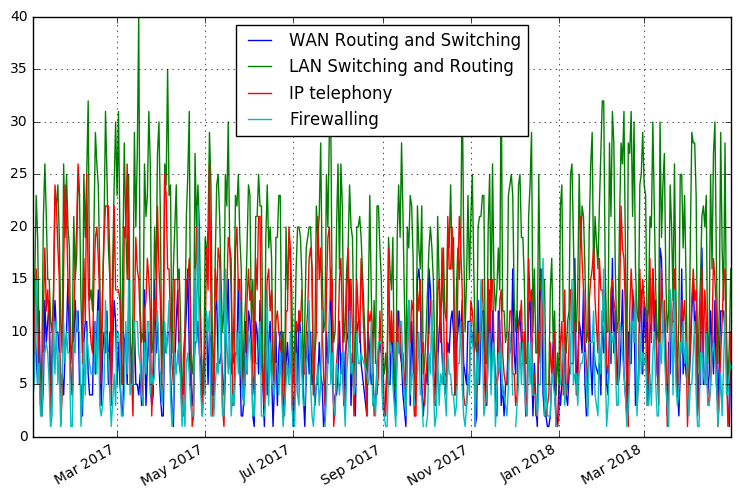

In [60]:
date_hits.plot(kind = 'line',figsize = (9,6),grid=True)

this density plot shows that mostly the number of posts made on a day is between 10 to 30

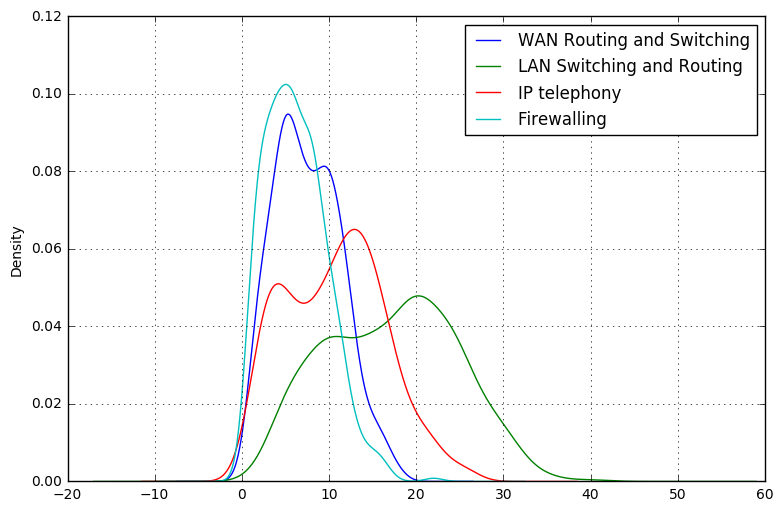

In [43]:
date_hits.plot(kind = 'density',figsize = (9,6),grid = True)

#### Monthly Analysis

As from the bar chart shown below it can be seen that the number of posts in each month has low standard deviation and remains fairly constant maybe we can get a better insight of data by analysing the individual post text.

In [18]:
monthly_hits = pd.DataFrame()
for i, df in enumerate(filtered_data):
    monthly_hits[topic[i]] = df['Date'].groupby(df.Date.dt.to_period("M")).agg('count')

monthly_hits.head()

,WAN Routing and Switching,LAN Switching and Routing,IP telephony,Firewalling
Date,,,,
2017-01,248,485,361,193
2017-02,218,541,419,183
2017-03,211,614,383,230
2017-04,211,489,332,193
2017-05,246,549,361,212


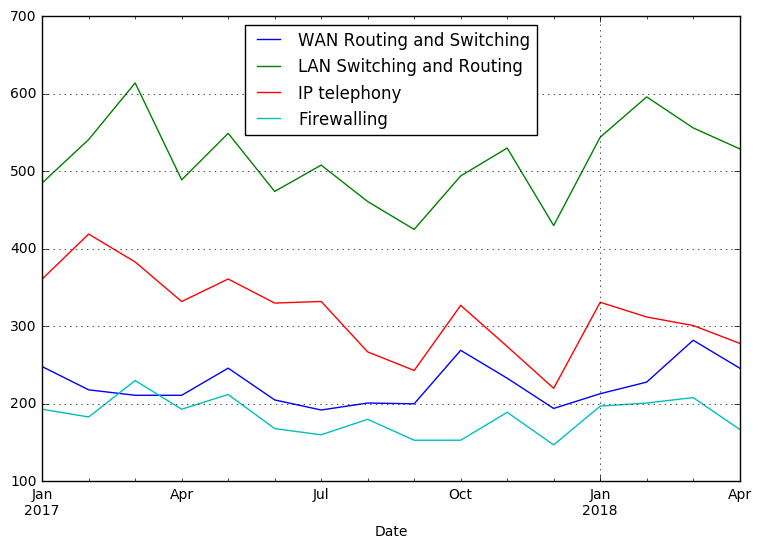

In [77]:
monthly_hits.plot(kind = 'line',grid = True,figsize = (9,6))

Most months have posts ranging between 450 to 550.

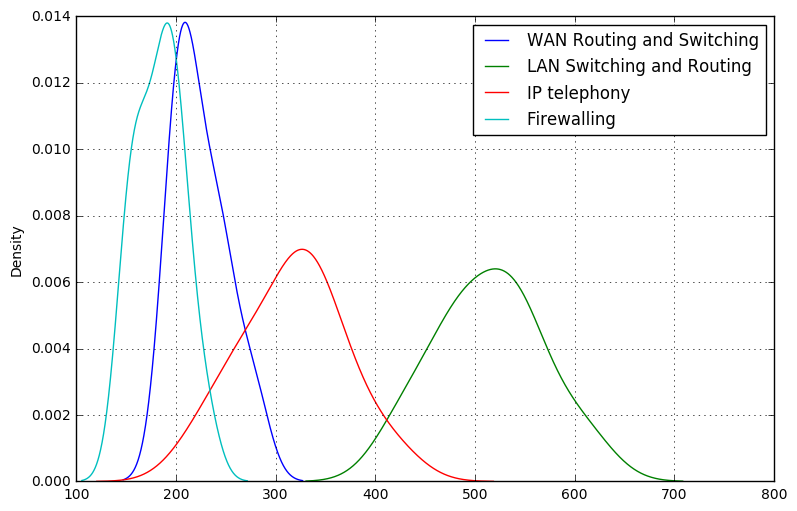

In [42]:
monthly_hits.plot(kind = 'density',figsize = (9,6),grid = True)

#### Community Scoring
The activity of any forum is not only based on the number of posts posted but also based on how actively the community participates to solve ones problem.

In [26]:
replied_posts =  [df[((df['Replies']) > 0 ) & ( df['Date'] > '2017-01-01') & (df['Date'] < '2018-05-01') ]  for df in data]

In [27]:
reply_percentage = [len(rp)*100//len(fd) for rp,fd  in list(zip(replied_posts,filtered_data))]
for percent in reply_percentage:
    print("\nPercentage of posts which have got atleast one reply : {} %\n".format(percent))


Percentage of posts which have got atleast one reply : 86 %


Percentage of posts which have got atleast one reply : 86 %


Percentage of posts which have got atleast one reply : 87 %


Percentage of posts which have got atleast one reply : 84 %



In [23]:
upvoted_posts = [df[((df['Upvotes']) > 0) &(df['Date'] > '2017-01-01') & (df['Date'] < '2018-05-01')] for df in data]

In [24]:
upvote_percentage = [len(up)*100//len(fd) for up,fd  in list(zip(upvoted_posts,filtered_data))]
for percent in upvote_percentage:
    print("\nPercentage of posts which have got atleast one reply and marked helpful: {} %\n".format(percent))


Percentage of posts which have got atleast one reply and marked helpful: 21 %


Percentage of posts which have got atleast one reply and marked helpful: 20 %


Percentage of posts which have got atleast one reply and marked helpful: 23 %


Percentage of posts which have got atleast one reply and marked helpful: 20 %



In [34]:
resolved_posts = [df[((df['Resolved']) > 0) &(df['Date'] > '2017-01-01') & (df['Date'] < '2018-05-01')] for df in data]
resolved_percentage = [len(up)*100//len(fd) for up,fd  in list(zip(resolved_posts,filtered_data))]
for percent in resolved_percentage:
    print("\nPercentage of posts which have got atleast one reply and marked helpful: {} %\n".format(percent))


Percentage of posts which have got atleast one reply and marked helpful: 27 %


Percentage of posts which have got atleast one reply and marked helpful: 27 %


Percentage of posts which have got atleast one reply and marked helpful: 25 %


Percentage of posts which have got atleast one reply and marked helpful: 29 %



In [54]:
raw_data = {
    'topic' : ['WAN','LAN','IP Telephony','Firewalling'],
    'upvote':upvote_percentage,
    'reply' : reply_percentage,
    'resolved' : resolved_percentage
}
activity = pd.DataFrame(raw_data, columns = ['topic', 'upvote', 'reply', 'resolved'])

In [55]:
activity

,topic,upvote,reply,resolved
0,WAN,21,86,27
1,LAN,20,86,27
2,IP Telephony,23,87,25
3,Firewalling,20,84,29


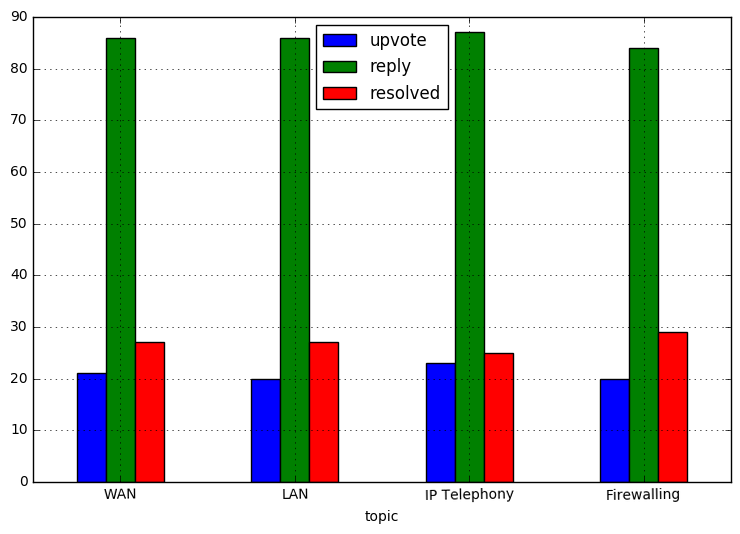

In [56]:
activity.plot(kind = 'bar',grid = True,x = 'topic',figsize = (9,6),rot = 1)

In [87]:
views = []
for i, df in enumerate(filtered_data):
    views.append(df['Views'].sum())


([<matplotlib.axis.XTick at 0x2823a1b1e80>,
 <a list of 4 Text xticklabel objects>)

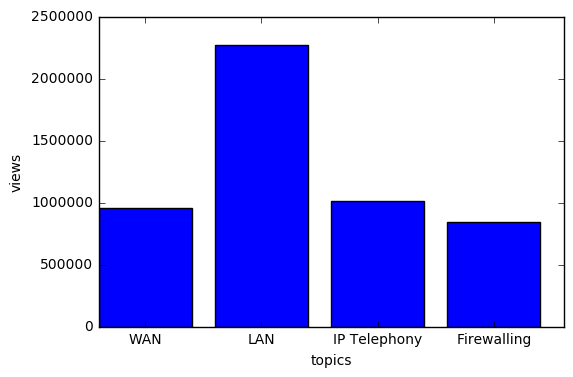

In [95]:
import numpy as np
x = np.arange(4) +1
plt.xlabel('topics')
plt.ylabel('views')
plt.bar(x, height= views)
plt.xticks(x+0.4, ['WAN','LAN','IP Telephony','Firewalling'])


### Post Text based analysis

In [97]:
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter


stopword_file = open("terrier-stop.txt","r")
t_stop = stopword_file.read().splitlines()

In [98]:
def comment_cleaner(comment):
    
    words = nltk.word_tokenize(comment)
    words = [word.lower() for word in words if word.isalpha()]
    table = str.maketrans('', '', string.punctuation)
    words = [word.translate(table) for word in words]
    words = [word for word in words if word.isalpha()]
    
    word_tags = nltk.pos_tag(words)
    
    #words = [word for word,tag in word_tags if tag in ('NN','JJ','NNP','NNS','NNPS')]
    #words.extend([word[-1] for word,tag in word_tags if tag in ('NNS','NNPS')])
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    words = [word for word in words if not word in t_stop]
    # stemming of words
    #lemma = nltk.stem.wordnet.WordNetLemmatizer()
    #words = [lemma.lemmatize(word) for word in words]
        
    #porter = PorterStemmer()
    #words = [porter.stem(word) for word in words]
    cleaned_comment = ' '.join(words)
    
    return cleaned_comment

In [104]:
post_list = [filtered_data[i]['Post'].tolist() for i in range(len(filtered_data))]

In [107]:
all_posts = []
all_words = []
for i in range(len(filtered_data)):
    #all_posts = " ".join(str(post) for post in post_list)
    cleaned_posts = [comment_cleaner(str(post)) for post in post_list[i]]
    all_posts.append(" ".join(cleaned_posts))
    all_words.append(all_posts[i].split())

WAN Routing and Switching




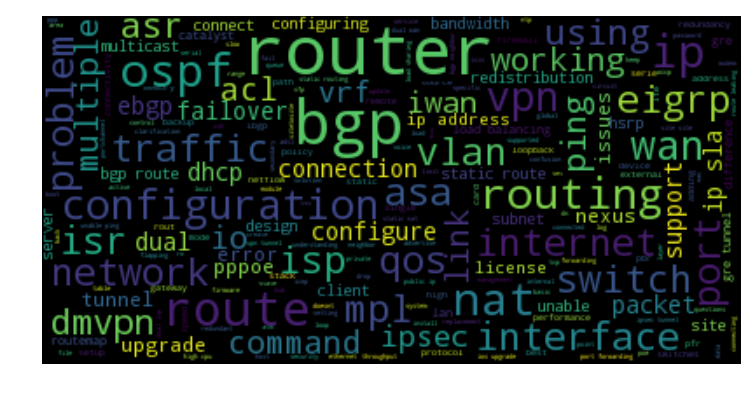

LAN Switching and Routing




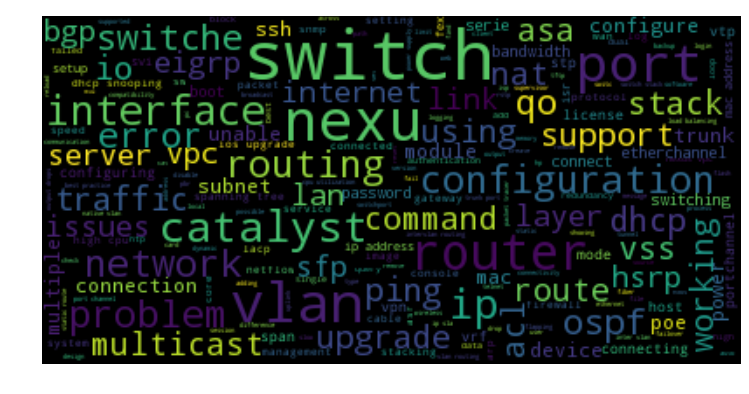

IP telephony




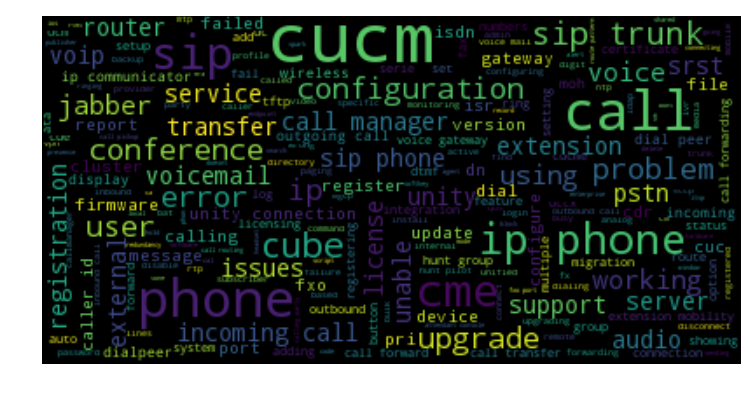

Firewalling




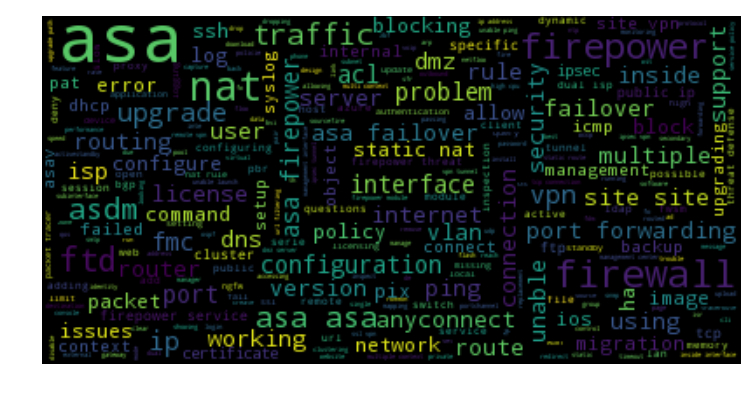

In [110]:
from wordcloud import WordCloud, STOPWORDS
stopwords_w = set(STOPWORDS)

for i in range(len(filtered_data)):
    print(topic[i]+"\n\n")
    wordcloud = WordCloud(
                              background_color='black',
                              stopwords=stopwords_w,
                              max_words=300,
                              max_font_size=40, 
                              random_state=42
                             ).generate(all_posts[i])

    plt.figure(figsize=(9,6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/
https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html